# Project 2 - Shiv Gunjal
The main hypothesis of this project is to use Machine Learning to attain efficient and precise prediction of bank failure in the USA. Using machine learning we can actually identify the features which can help us specify a model which has high prediction accuracy and minimum MSE.(Explained in more detail in the final report) The data used in this study contains the various accounting measures and financial ratios indicating the financial health of banks in US. This data is gathered from FDIC data set which can be found @ https://www5.fdic.gov/sdi/main.asp?formname=customddownload 
The frequency of data is quarterly and the range is from First Quarter of 2011 till fourth quarter of 2016. The data includes various features collected from bank balance sheets and further calculations of ratios based on these records evaluating both the asset and liability side financial health of banks.

In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('whitegrid')

import plotly
plotly.offline.init_notebook_mode() 


# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
#%matplotlib notebook-----I would have loved to use this option but my PC is not bale to handle it.
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import pickle

In [2]:
df = pd.read_pickle('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\bank_model_data.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779047 entries, 0 to 779046
Data columns (total 70 columns):
cert               779047 non-null int64
docket             779047 non-null int64
fed_rssd           779047 non-null int64
rssdhcr            779047 non-null int64
name               779047 non-null object
city               779047 non-null object
stalp              779047 non-null object
zip                779047 non-null int64
repdte             779047 non-null datetime64[ns]
rundate            779047 non-null datetime64[ns]
bkclass            779047 non-null object
address            779002 non-null object
namehcr            545202 non-null object
offdom             779047 non-null int64
offfor             779047 non-null int64
stmult             779047 non-null int64
specgrp            779047 non-null int64
subchaps           779047 non-null int64
county             779047 non-null object
cbsa_metro         442021 non-null float64
cbsa_metro_name    442021 non-null object


# Creating Pandas Date Time 
I am creating variavles for date and Year by using the following method. The reson for doing so is that the complete data set contains total 779046 number of observations and I can restrict or use sub-sample of this whole data set for further analysis.

In [4]:
df['date'] = pd.to_datetime(df['repdte'])
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year
df.head(3)

,cert,docket,fed_rssd,rssdhcr,name,city,stalp,zip,repdte,rundate,...,rbc1aaj,rbc1rwaj,rbcrwaj,asset5,ernast5,eq5,lnlsgr5,date,month,year
0,15448,0,1006858,1495818,1st American State Bank of Minnesota,Hancock,MN,56244,1995-03-31,2016-08-04,...,10.503145,14.788740,15.851404,13625.0,12500.5,1378.5,8140.0,1995-03-31,3,1995
1,23309,11422,431743,1134322,1st Bank,West Branch,MI,48661,1995-03-31,2016-08-04,...,6.496904,9.199507,10.456037,85254.5,78699.5,5811.5,66411.5,1995-03-31,3,1995
2,16419,0,419255,1055780,1st Bank & Trust,Broken Bow,OK,74728,1995-03-31,2016-08-04,...,8.379969,12.762535,14.015484,48797.0,44047.0,3997.5,34831.5,1995-03-31,3,1995


I'll use data from January 2011 to December 2016. The data used for the purpose of this study has a frequency of Quarterly observations totalling to 24 quarters of coverage.

In [5]:
df5= df[(df.year > 2010)]

In [6]:
#cheching the start date for data
df5.head(3)

,cert,docket,fed_rssd,rssdhcr,name,city,stalp,zip,repdte,rundate,...,rbc1aaj,rbc1rwaj,rbcrwaj,asset5,ernast5,eq5,lnlsgr5,date,month,year
616695,57899,0,3317192,3370517,1st Advantage Bank,Saint Peters,MO,63376,2011-03-31,2017-02-21,...,82.886664,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011
616696,16522,0,888253,2003975,1ST BANK,Evanston,WY,82930,2011-03-31,2017-02-21,...,53.277749,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011
616697,22039,0,564856,1128415,1st Bank,Sidney,MT,59270,2011-03-31,2017-02-21,...,58.954996,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011


In [7]:
print df5.shape
print df5.info()

(162352, 73)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 73 columns):
cert               162352 non-null int64
docket             162352 non-null int64
fed_rssd           162352 non-null int64
rssdhcr            162352 non-null int64
name               162352 non-null object
city               162352 non-null object
stalp              162352 non-null object
zip                162352 non-null int64
repdte             162352 non-null datetime64[ns]
rundate            162352 non-null datetime64[ns]
bkclass            162352 non-null object
address            162352 non-null object
namehcr            120159 non-null object
offdom             162352 non-null int64
offfor             162352 non-null int64
stmult             162352 non-null int64
specgrp            162352 non-null int64
subchaps           162352 non-null int64
county             162352 non-null object
cbsa_metro         90320 non-null float64
cbsa_metro_name    90320 

Here I am dropping some common identifiers from the dataset which will not be used for Exploratory data analysis.

In [8]:
#dropping columns which are not required for the analysis
df5.drop([
        'docket',             
        'fed_rssd',           
        'rssdhcr',            
        'name',               
        'city',               
        'stalp',              
        'zip',                
        'repdte',             
        'rundate',            
        'bkclass',           
        'address',            
        'namehcr',            
        'stmult',             
        'specgrp',            
        'subchaps',           
        'county',             
        'cbsa_metro',         
        'cbsa_metro_name',    
        'estymd',             
        'insdate',            
        'effdate',            
        'mutual',             
        'parcert',            
        'trust',              
        'regagnt',            
        'insagnt1',           
        'fdicdbs',            
        'fdicsupv',           
        'fldoff',             
        'fed',                
        'occdist',            
        'otsregnm',           
        'webaddr',            
        'idntilr',            
        'idntigr'            


    ], axis = 1, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 38 columns):
cert        162352 non-null int64
offdom      162352 non-null int64
offfor      162352 non-null int64
intincy     0 non-null float64
intexpy     0 non-null float64
nimy        162114 non-null float64
noniiay     162114 non-null float64
nonixay     162114 non-null float64
noijy       162136 non-null float64
roa         162136 non-null float64
roaptx      162136 non-null float64
roe         162136 non-null float64
roeinjr     162136 non-null float64
ntlnlsr     162136 non-null float64
elnantr     162136 non-null float64
iderncvr    162136 non-null float64
eeffr       161118 non-null float64
astempm     146690 non-null float64
iddivnir    113883 non-null float64
lnatresr    162113 non-null float64
lnresncr    161798 non-null float64
nperfv      162047 non-null float64
nclnlsr     162136 non-null float64
lnlsntv     161061 non-null float64
lnlsdepr    149441 non-null float64


In [10]:
#before cleaning the columns I am renaming the columns so that it becomes easy to call spesific columns as an 
#when required
df5.rename(columns={
    'offdom' : 'no_domestic_branches',
    'offfor' : 'no_foreign_branches',
    'intincy' : 'yield_on_earning_assets',
    'intexpy' : 'cost_of_funding_earning_assets',
    'nimy' : 'net_interest_margin',
    'noniiay' : 'noninterest_income_to_avg_assets',
    'nonixay' : 'noninterest_expense_to_avg_assets',
    'noijy' : 'net_operating_income_to_assets',
    'roaptx' : 'pretax_roa',
    'roeinjr' : 'retained_earnings_to_avg_equity',
    'ntlnlsr' : 'net_charge_offs_to_loans',
    'elnantr' : 'credit_loss_provision_to_net_charge_offs',
    'iderncvr' : 'earnings_coverage_of_net_charge_offs',
    'eeffr' : 'efficiency_ratio',
    'astempm' : 'assets_per_employee_millions',
    'iddivnir' : 'cash_dividends_to_net_income',
    'lnatresr' : 'loss_allowance_to_loans',
    'lnresncr' : 'loan_loss_allowance_to_noncurrent_loans',
    'nperfv' : 'noncurrent_assets+other_real_estate_owned_to_assets',
    'nclnlsr' : 'noncurrent_loans_to_loans',
    'lnlsntv' : 'net_loans_and_leases_to_total_assets',
    'lnlsdepr' : 'net_loans_and_leases_to_deposits',
    'idlncorr' : 'net_loans_and_leases_to_core_deposits',
    'depdastr' : 'total_domestic_deposits_to_total_assets',
    'eqv' : 'equity_capital_to_assets',
    'rbc1aaj' : 'corecapital_leverage_ratio',
    'rbc1rwaj' : 't1_risk_based_capital_ratio',
    'rbcrwaj' : 'total_risk_based_capital_ratio',
    'asset5' : 'avg_total_assets',
    'ernast5' : 'avg_earning_assets',
    'eq5' : 'avg_equity',
    'lnlsgr5' : 'avg_total_loans'

    }, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162352 entries, 616695 to 779046
Data columns (total 38 columns):
cert                                                   162352 non-null int64
no_domestic_branches                                   162352 non-null int64
no_foreign_branches                                    162352 non-null int64
yield_on_earning_assets                                0 non-null float64
cost_of_funding_earning_assets                         0 non-null float64
net_interest_margin                                    162114 non-null float64
noninterest_income_to_avg_assets                       162114 non-null float64
noninterest_expense_to_avg_assets                      162114 non-null float64
net_operating_income_to_assets                         162136 non-null float64
roa                                                    162136 non-null float64
pretax_roa                                             162136 non-null float64
roe                            

In [12]:
df5.drop([
          'yield_on_earning_assets',                                
          'cost_of_funding_earning_assets',           


    ], axis = 1, inplace=True)

                        

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




The data set named Failed is the list of Banks which failed during the time 2011-2016 which is obtained from https://www.fdic.gov/bank/individual/failed/banklist.html Banks belonging to this list has a value 1 in feature fail.

In [13]:
ff = pd.read_excel('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\Failed.xlsx')

In [14]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
cert    194 non-null int64
fail    194 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


In [15]:
ff.head(5)

,cert,fail
0,35495,1
1,19328,1
2,34951,1
3,91,1
4,11297,1


Now I am merging the list of failed banks with the data set on financial ratio's of banks to create a structured data set for further analysis

In [16]:
df5 = pd.merge(df5, ff, on=['cert'], how='left')

In [17]:
#checking for missing values
df5.isnull().sum()

cert                                                        0
no_domestic_branches                                        0
no_foreign_branches                                         0
net_interest_margin                                       238
noninterest_income_to_avg_assets                          238
noninterest_expense_to_avg_assets                         238
net_operating_income_to_assets                            216
roa                                                       216
pretax_roa                                                216
roe                                                       216
retained_earnings_to_avg_equity                           216
net_charge_offs_to_loans                                  216
credit_loss_provision_to_net_charge_offs                  216
earnings_coverage_of_net_charge_offs                      216
efficiency_ratio                                         1234
assets_per_employee_millions                            15662
cash_div

In [18]:
df5.head(5)

,cert,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
0,57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,NaN
1,16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,NaN
2,22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,NaN
3,16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,NaN
4,30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,NaN


# Creating a binary classification variable
After merging the list of failed banks with the main data set of financials, the banks which were not in the list of failed banks have NaN(missing values). I have replaced these missing values by 0 which automatically gives me a binary (dummy) variable which I'll use as my dependent variable for bank failure / merger predictions.

In [19]:
df5['fail'].fillna(0, inplace=True)

In [20]:
df5.head(5)

,cert,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
0,57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,0.0
1,16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,0.0
2,22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,0.0
3,16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,0.0
4,30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,0.0


# Dealing with Missing Values:
Before undertaking the task of model specification, it is necessary to make sure that the data set is clean and structured. I have replaced the misssing values by its means. 
Here I'm setting up the data by resetting the index to 'cert' which is an unique identifier number for each bank. By doing so I'll be able to replace the missing values by mean for a bank for a specific feature instead of replacing it by the mean of whole data set.

In [21]:
df1 = df5.set_index(['cert'])

In [22]:
df1.head(5)

,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,retained_earnings_to_avg_equity,...,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,date,month,year,fail
cert,,,,,,,,,,,,,,,,,,,,,
57899,1,0,4.604956,1.820234,2.784722,1.636115,2.696798,0.000000,1.468638,1.468638,...,103.789183,87.083641,4.239199,4.143029,5.492416,6.772908,2011-03-31,3,2011,0.0
16522,10,0,4.011720,0.621587,3.390133,0.359687,2.008662,0.547469,0.603310,0.603310,...,64.206384,62.962073,14.300571,9.115548,17.184681,18.458836,2011-03-31,3,2011,0.0
22039,2,0,3.752850,0.454120,3.298729,0.340009,2.116384,0.000000,1.373915,1.373915,...,59.831208,84.778946,10.484617,9.225209,17.421846,18.650331,2011-03-31,3,2011,0.0
16419,4,0,5.346581,0.442040,4.904540,1.224681,2.905400,0.246407,2.357419,2.357419,...,55.370188,90.563341,9.071540,8.368289,13.638998,14.771494,2011-03-31,3,2011,0.0
30367,3,0,4.694297,1.123654,3.570642,0.464130,2.322320,0.347263,0.671152,0.671152,...,88.128709,91.315719,7.597768,7.597768,11.661662,12.388027,2011-03-31,3,2011,0.0


# Replacing missing values by means:
Using groupby and transform method in tandom with a lambda function I have replaced the missing values by means.
Since I have set 'cert' as an index I can replace the missing values for each bank by its mean using the groupby and tranform method. I have used a lambda function to transform the missing values to mean and done for features of interest.

In [23]:
#replacing missing values by mean of the group
df1['credit_loss_provision_to_net_charge_offs'] = df1.groupby(level=0)['credit_loss_provision_to_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['earnings_coverage_of_net_charge_offs'] = df1.groupby(level=0)['earnings_coverage_of_net_charge_offs'].transform( lambda x: x.fillna(x.mean()))
df1['efficiency_ratio'] = df1.groupby(level=0)['efficiency_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['assets_per_employee_millions'] = df1.groupby(level=0)['assets_per_employee_millions'].transform( lambda x: x.fillna(x.mean()))
df1['loan_loss_allowance_to_noncurrent_loans'] = df1.groupby(level=0)['loan_loss_allowance_to_noncurrent_loans'].transform( lambda x: x.fillna(x.mean()))
df1['noncurrent_loans_to_loans'] = df1.groupby(level=0)['noncurrent_loans_to_loans'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_total_assets'] = df1.groupby(level=0)['net_loans_and_leases_to_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['net_loans_and_leases_to_deposits'] = df1.groupby(level=0)['net_loans_and_leases_to_deposits'].transform( lambda x: x.fillna(x.mean()))
df1['cash_dividends_to_net_income'] = df1.groupby(level=0)['cash_dividends_to_net_income'].transform( lambda x: x.fillna(x.mean()))
df1['roa'] = df1.groupby(level=0)['roa'].transform( lambda x: x.fillna(x.mean()))
df1['roe'] = df1.groupby(level=0)['roe'].transform( lambda x: x.fillna(x.mean()))
df1['corecapital_leverage_ratio'] = df1.groupby(level=0)['corecapital_leverage_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['total_risk_based_capital_ratio'] = df1.groupby(level=0)['total_risk_based_capital_ratio'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_assets'] = df1.groupby(level=0)['avg_total_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_earning_assets'] = df1.groupby(level=0)['avg_earning_assets'].transform( lambda x: x.fillna(x.mean()))
df1['avg_equity'] = df1.groupby(level=0)['avg_equity'].transform( lambda x: x.fillna(x.mean()))
df1['avg_total_loans'] = df1.groupby(level=0)['avg_total_loans'].transform( lambda x: x.fillna(x.mean()))
df1['loss_allowance_to_loans'] = df1.groupby(level=0)['loss_allowance_to_loans'].transform( lambda x: x.fillna(x.mean()))


In [24]:
#checking for missing values
df1.isnull().sum()

no_domestic_branches                                      0
no_foreign_branches                                       0
net_interest_margin                                     238
noninterest_income_to_avg_assets                        238
noninterest_expense_to_avg_assets                       238
net_operating_income_to_assets                          216
roa                                                     216
pretax_roa                                              216
roe                                                     216
retained_earnings_to_avg_equity                         216
net_charge_offs_to_loans                                216
credit_loss_provision_to_net_charge_offs                216
earnings_coverage_of_net_charge_offs                    216
efficiency_ratio                                       1056
assets_per_employee_millions                           2835
cash_dividends_to_net_income                           3611
loss_allowance_to_loans                 

As we can see after replacing the missing values by mean we still have some missing values which can be because of lack of observations for a bank to calculate mean. So i'll drop such missing pbservations since they can not be replaced.

In [25]:
df1.dropna(axis=0, inplace=True)
df1.isnull().sum()

no_domestic_branches                                   0
no_foreign_branches                                    0
net_interest_margin                                    0
noninterest_income_to_avg_assets                       0
noninterest_expense_to_avg_assets                      0
net_operating_income_to_assets                         0
roa                                                    0
pretax_roa                                             0
roe                                                    0
retained_earnings_to_avg_equity                        0
net_charge_offs_to_loans                               0
credit_loss_provision_to_net_charge_offs               0
earnings_coverage_of_net_charge_offs                   0
efficiency_ratio                                       0
assets_per_employee_millions                           0
cash_dividends_to_net_income                           0
loss_allowance_to_loans                                0
loan_loss_allowance_to_noncurre

In [26]:
#Getting the count for my dependent variable which is a dummy variable
df1.fail.value_counts()

0.0    156886
1.0      1127
Name: fail, dtype: int64

Before proceeding with Model Specification I'll first look at the correlation coefficients for all the features in the data set to get a rough sense of the data.It will also be helpful to overcome the issue of multicolinearity.

In [27]:
df1.corr()

,no_domestic_branches,no_foreign_branches,net_interest_margin,noninterest_income_to_avg_assets,noninterest_expense_to_avg_assets,net_operating_income_to_assets,roa,pretax_roa,roe,retained_earnings_to_avg_equity,...,corecapital_leverage_ratio,t1_risk_based_capital_ratio,total_risk_based_capital_ratio,avg_total_assets,avg_earning_assets,avg_equity,avg_total_loans,month,year,fail
no_domestic_branches,1.000000,0.577197,-0.041718,-0.042120,-0.029608,0.009542,-0.000348,0.007137,0.002611,0.002386,...,-0.000928,-0.001522,-0.103676,0.002536,-0.031208,-0.014833,-0.013200,0.000805,0.004920,-0.005492
no_foreign_branches,0.577197,1.000000,-0.024099,-0.013013,-0.021288,0.003289,-0.005430,0.002975,0.000804,0.000731,...,-0.000443,-0.000326,-0.110495,-0.001749,-0.012224,-0.004322,-0.003583,0.000260,0.001654,-0.002142
net_interest_margin,-0.041718,-0.024099,1.000000,0.386573,0.940076,-0.019072,0.150419,0.337962,0.051890,0.050362,...,0.084435,0.087858,-0.085179,0.020497,0.018690,-0.094391,-0.092060,0.000381,-0.236496,0.012515
noninterest_income_to_avg_assets,-0.042120,-0.013013,0.386573,1.000000,0.048948,-0.036585,-0.022490,0.250054,-0.076280,-0.073698,...,-0.009061,0.014059,-0.149918,-0.116445,-0.113035,-0.054838,-0.053518,-0.039005,-0.529758,0.126192
noninterest_expense_to_avg_assets,-0.029608,-0.021288,0.940076,0.048948,1.000000,-0.007129,0.171217,0.273564,0.084398,0.081789,...,0.094793,0.089952,-0.036823,0.065249,0.062031,-0.081951,-0.079914,0.014832,-0.060268,-0.033100
net_operating_income_to_assets,0.009542,0.003289,-0.019072,-0.036585,-0.007129,1.000000,0.826264,0.012387,0.918370,0.918218,...,-0.000497,0.000035,-0.165098,0.105221,0.110138,0.036576,0.035927,0.002505,0.004921,0.000593
roa,-0.000348,-0.005430,0.150419,-0.022490,0.171217,0.826264,1.000000,0.085090,0.602798,0.603050,...,-0.000782,-0.000073,-0.110008,0.050413,0.055941,0.019370,0.019817,0.004591,-0.018248,0.074980
pretax_roa,0.007137,0.002975,0.337962,0.250054,0.273564,0.012387,0.085090,1.000000,-0.137521,-0.136287,...,0.035762,0.057270,-0.010305,-0.084404,-0.095580,-0.050445,-0.049525,0.010509,-0.211851,0.185548
roe,0.002611,0.000804,0.051890,-0.076280,0.084398,0.918370,0.602798,-0.137521,1.000000,0.998637,...,0.016120,0.011762,-0.173779,0.150504,0.156038,0.025998,0.025071,0.004593,0.042759,-0.097913
retained_earnings_to_avg_equity,0.002386,0.000731,0.050362,-0.073698,0.081789,0.918218,0.603050,-0.136287,0.998637,1.000000,...,0.015952,0.011578,-0.174271,0.148823,0.153837,0.026016,0.025096,0.004547,0.040171,-0.096517


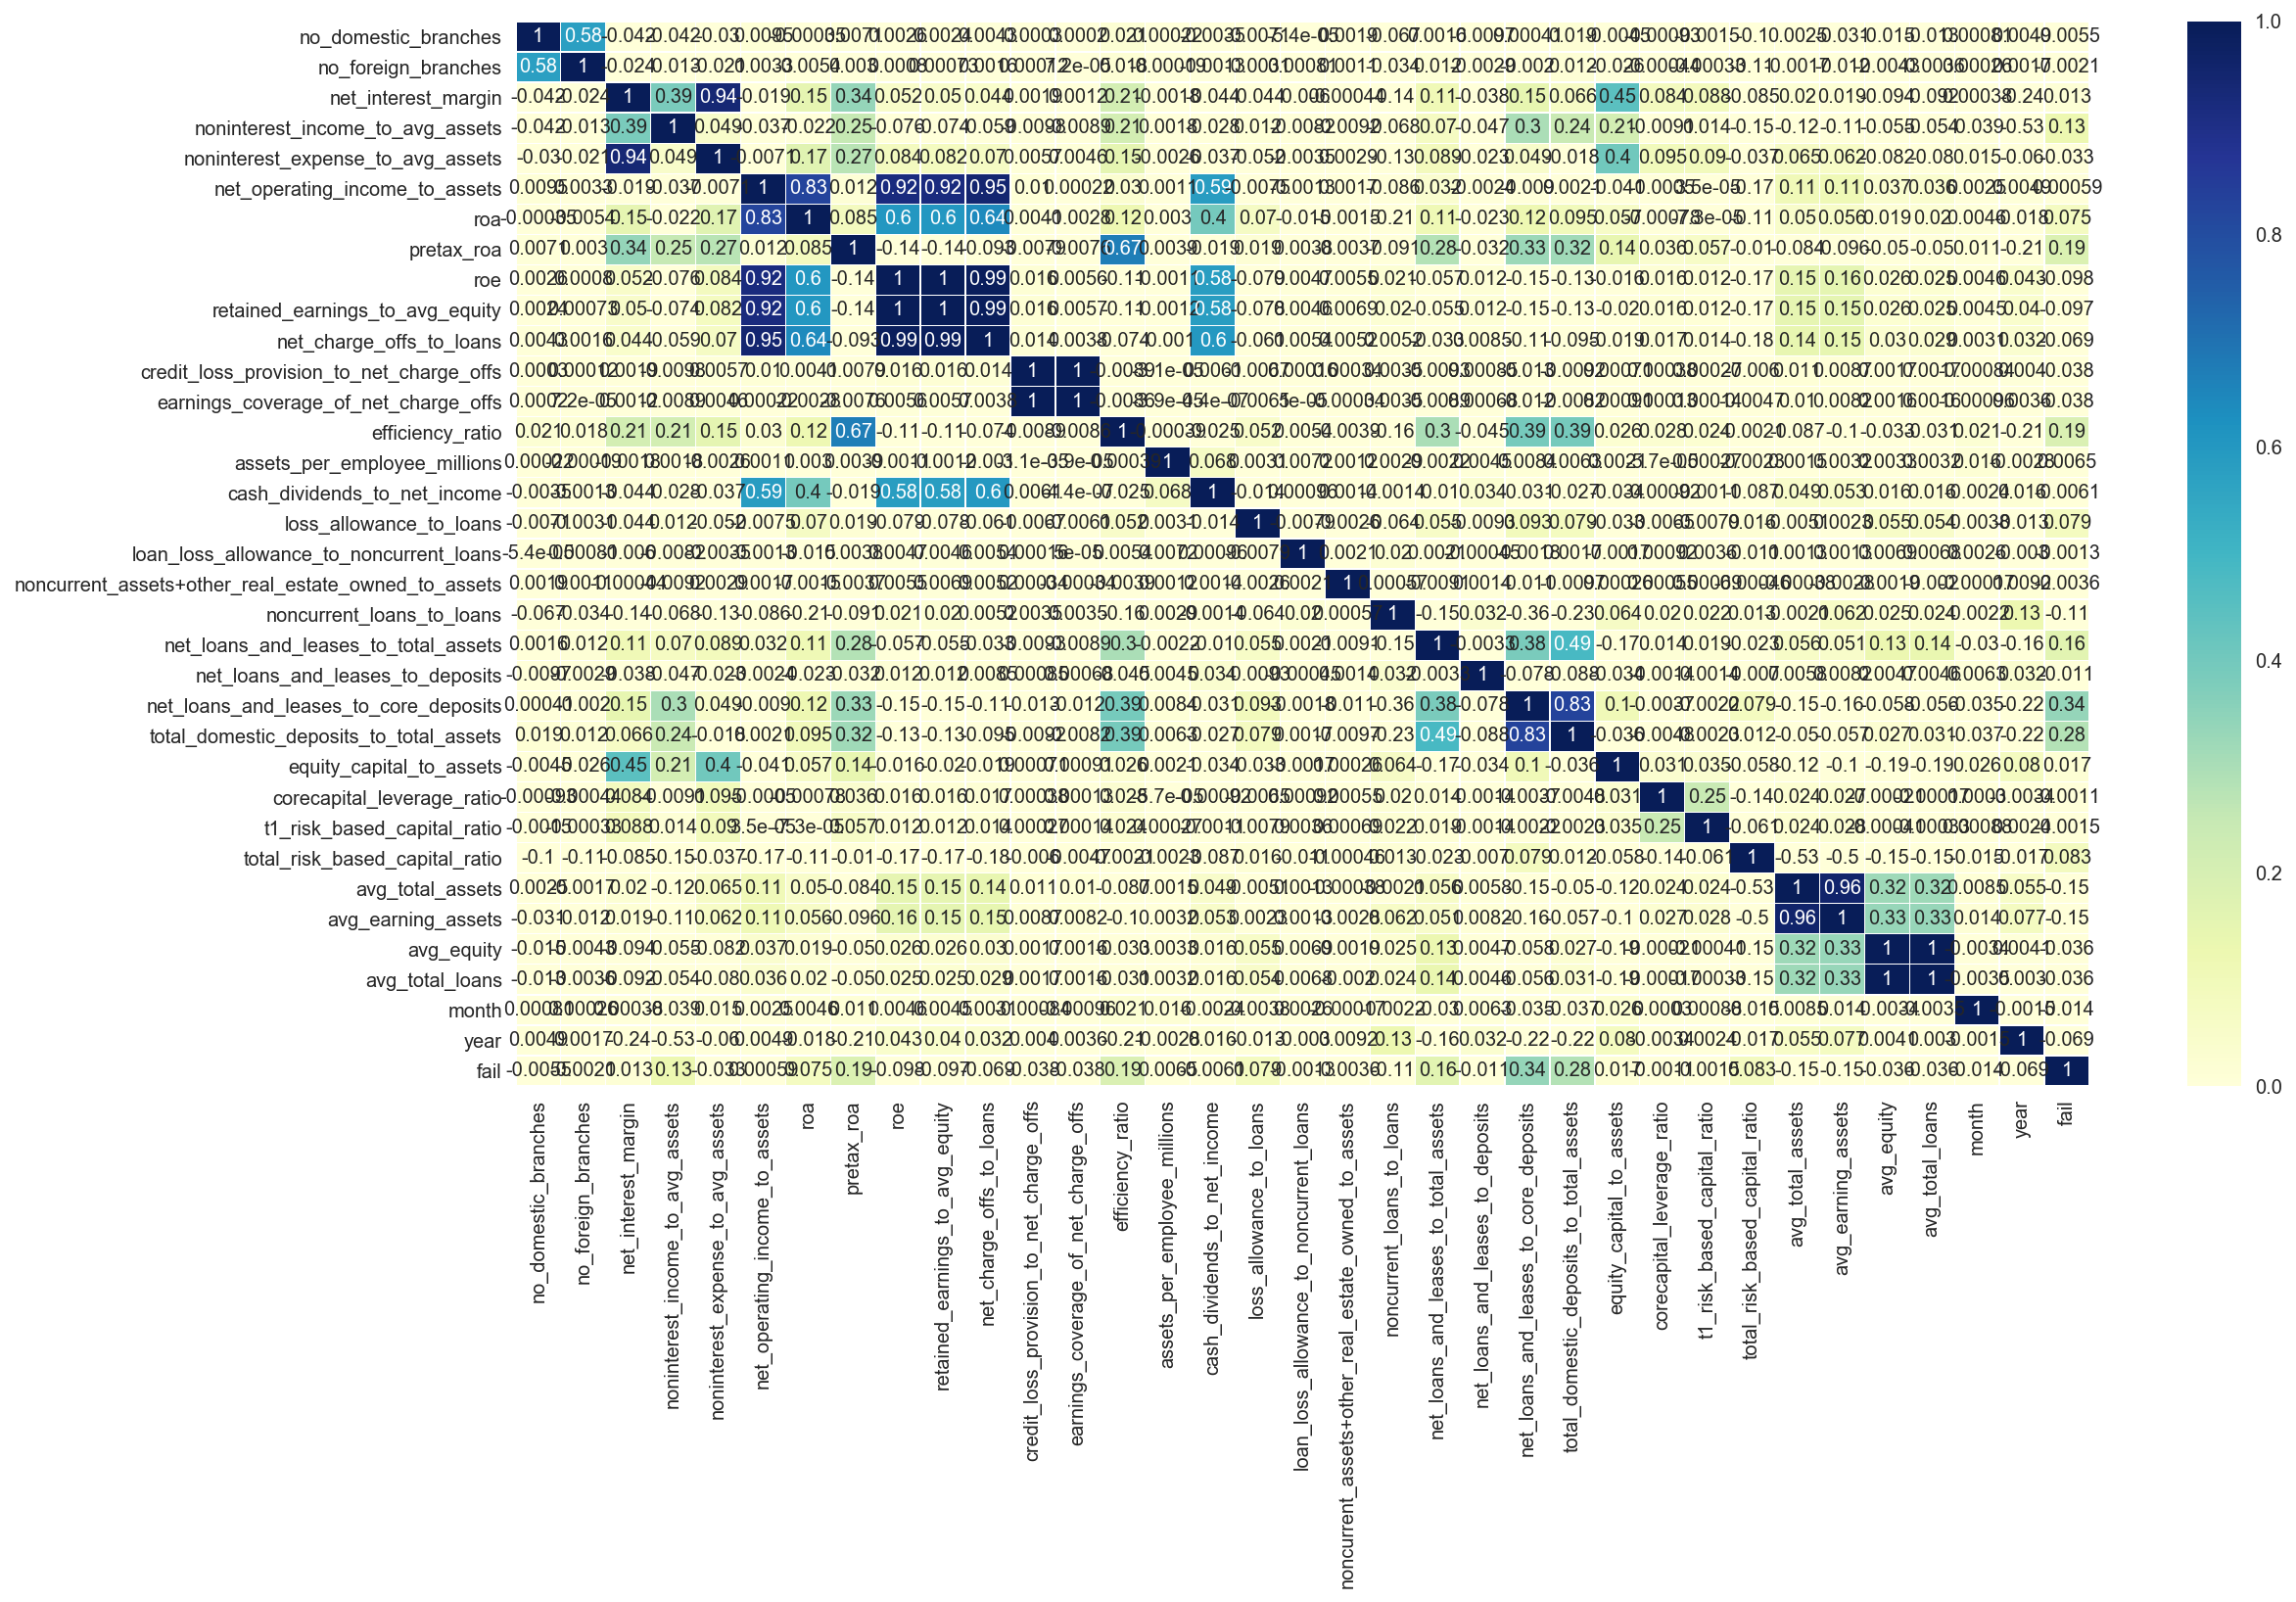

In [28]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df1.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

# Classification and creating train and test data sets 

In [29]:
df1['class'] = df1['fail'].astype('int')

In [30]:
#Defining X and Y
y = df1['class'] 
columns_ = df1.columns.tolist()
exclude_col = ['class','fail','date','month','year','no_domestic_branches','no_foreign_branches','pretax_roa',
              'noncurrent_loans_to_loans','net_loans_and_leases_to_core_deposits','total_domestic_deposits_to_total_assets',
              'corecapital_leverage_ratio','t1_risk_based_capital_ratio','avg_equity','avg_total_assets',
              'total_domestic_deposits_to_total_assets','earnings_coverage_of_net_charge_offs','net_charge_offs_to_loans',
              'retained_earnings_to_avg_equity','noninterest_expense_to_avg_assets','roe']

X = df1[[i for i in columns_ if i not in exclude_col]]

print X.shape, y.shape

(158013, 17) (158013L,)


As you can see I have avoided including the features which are highly correlated with each others. The way I have done this selection process is if for eg. there are three features like ROE(return on equity) and retained earnings on average equity, I will keep ROE and drop the other as ROE can be used across the industry as it's a ratio. 

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [32]:
#Splitting the data in train and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(110609L, 17L) (110609L,)
(47404L, 17L) (47404L,)


C:\Users\Shiv\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Model 1: Logistic Regression
Since the topic of my project is of classification issue, I have started with a logistic model.

In [33]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 10)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

C:\Users\Shiv\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [34]:
estimator.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 80.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 200.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 362.8min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 363.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

# Logistic Regression Model Evaluation
Estimating best paramerters and score of the best_estimator model retrieved by using gridsearch

In [35]:
logit_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", logit_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.994 



In [36]:
#calculating the probability of choosing a bank failure/merger
'''Remeber that 1 is bank failure '''
print df1['class'].value_counts(), "\n" 
print "If I randomly choose, %.0f percent of the time I will be choosing bank failure" % ((np.mean(df1['class']))*100)

0    156886
1      1127
Name: class, dtype: int64 

If I randomly choose, 1 percent of the time I will be choosing bank failure


Calculating Confusion metrix for the logistic regression (discussed in detail in the final report at the end of this notebook).

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Bank_Survived', 'True_Label_1 Bank_failed'],
                         columns=['Predict_Label_0 Bank_Survived', 'Predict_Label_1 Bank_failed'])

confusion

,Predict_Label_0 Bank_Survived,Predict_Label_1 Bank_failed
True_Label_0 Bank_Survived,47005,56
True_Label_1 Bank_failed,214,129


# Classification Report
Calculating classification report for the logistic regression (discussed in detail in the final report at the end of this notebook).

In [38]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     47061
          1       0.70      0.38      0.49       343

avg / total       0.99      0.99      0.99     47404



In [39]:
pwd

u'C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2'

In [40]:
cd C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\utils\\stats

C:\Users\Shiv\Desktop\ECON628-01-spgunjal\Project2\utils\stats


In [41]:
pwd

u'C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\utils\\stats'

# Graphical Representation of Confusion Matrix

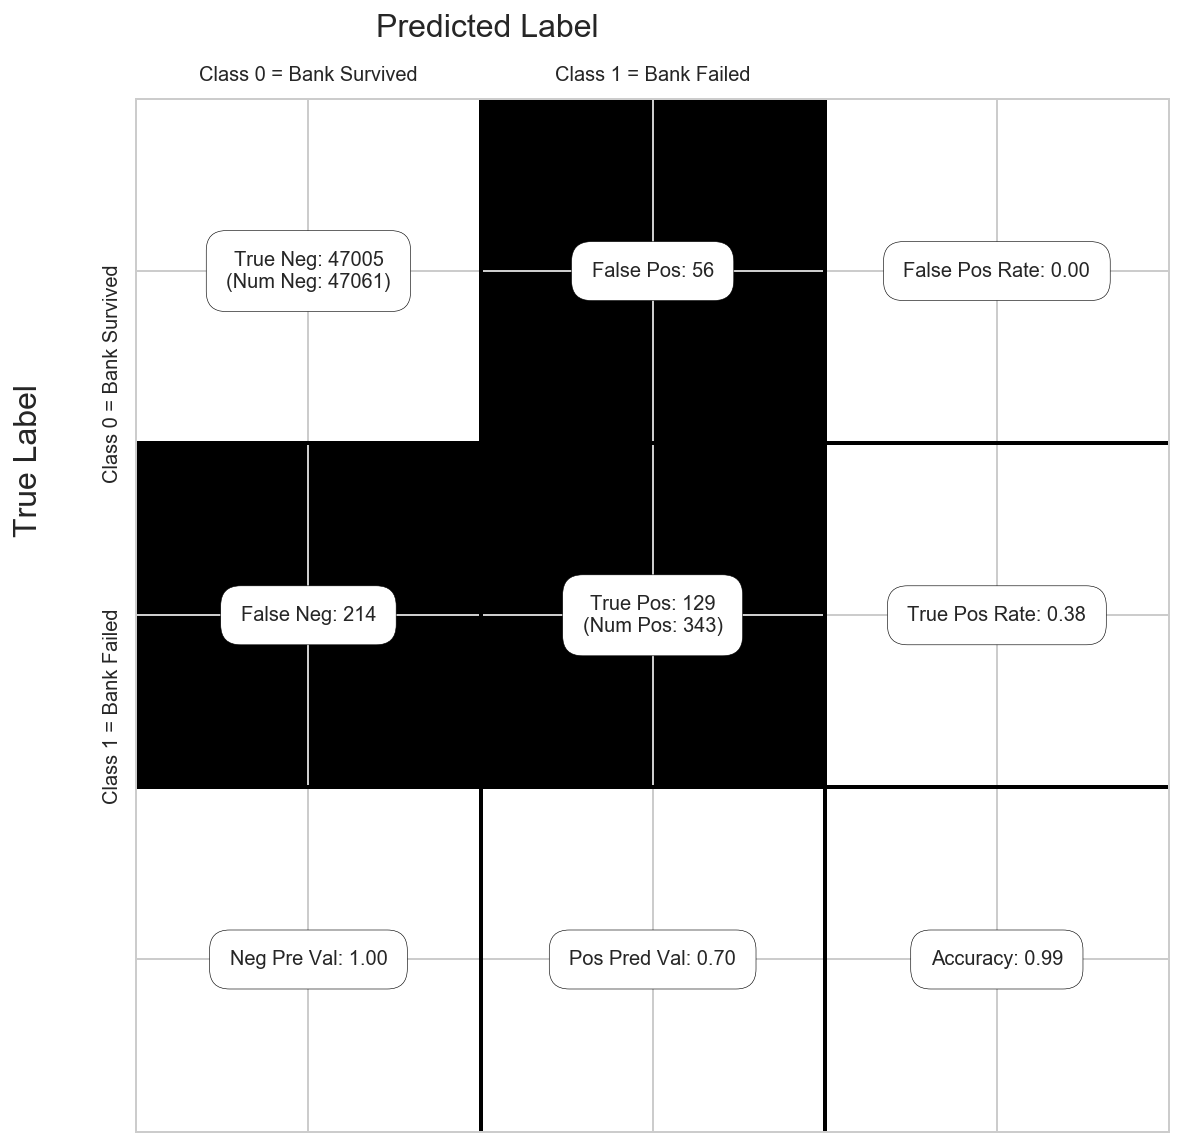

In [42]:
import imp
confusion = imp.load_source('confussion','C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Project2\\utils\\stats\\confussion.py')

from confussion import show_confusion_matrix

C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Bank Survived', 'Class 1 = Bank Failed'])

# Receiver Operating Characteristic Curve for Logistic Regression

C:\Users\Shiv\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning:

overflow encountered in exp



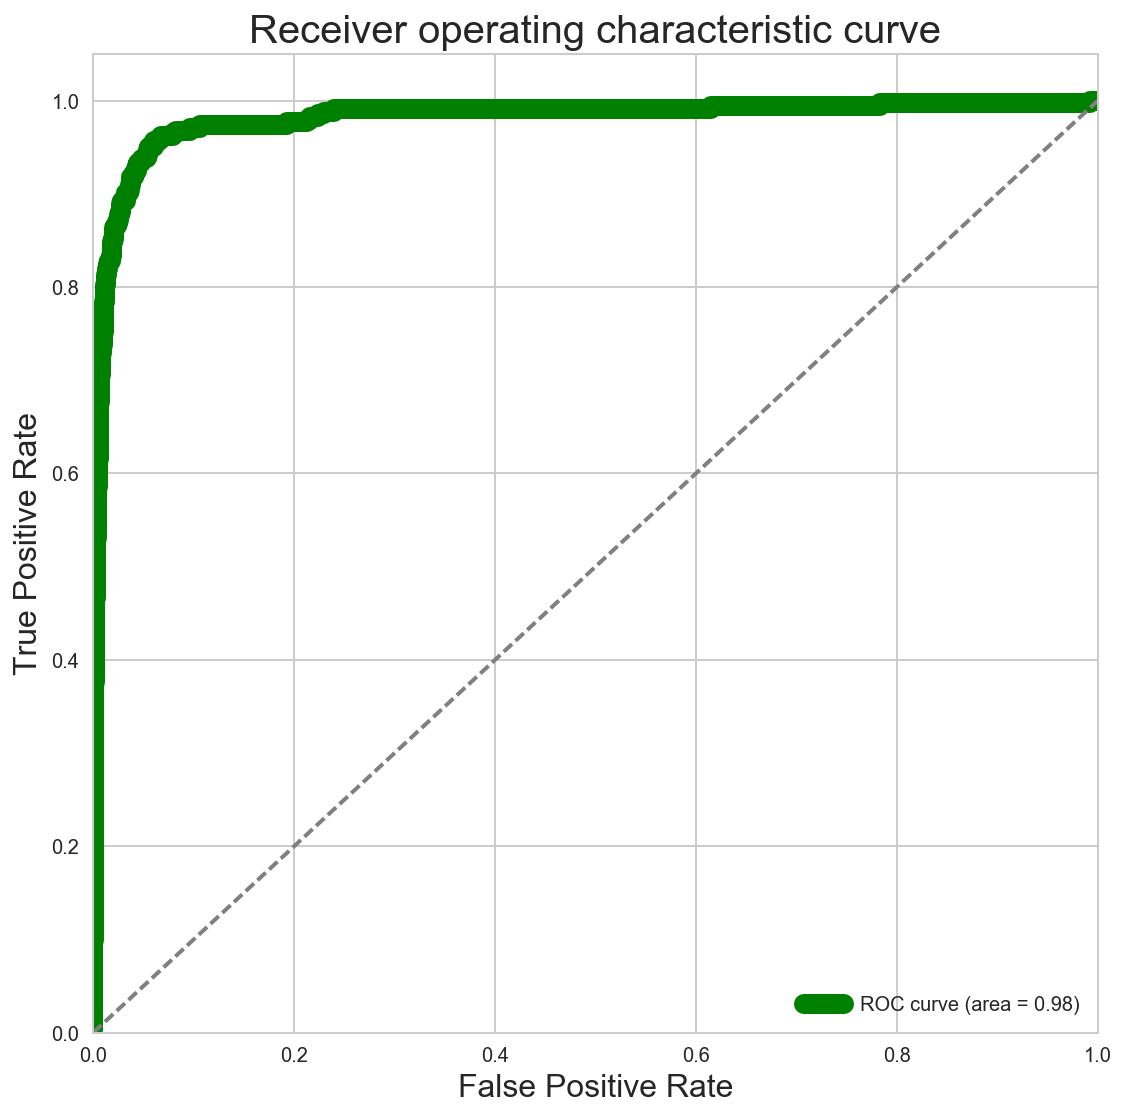

In [43]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Model 2: Decision Tree Classification
The second method for analysis that I have used is Decision Tree to evaluate a list of best features to build a modelfor predictive purpose

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [46]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

# Decision Tree Model Evaluation
Estimating best paramerters and score of the best_estimator model retrieved by using gridsearch

In [47]:
dct_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", dct_best
print ''

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best Params on hold out data (train):
{'max_features': 'auto', 'min_samples_split': 7, 'max_depth': 5, 'min_samples_leaf': 1}


Best Score on left out data:0.994 




# Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
y_pred=gsdt.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Bank_Survived', 'True_Label_1 Bank_failed'],
                         columns=['Predict_Label_0 Bank_Survived', 'Predict_Label_1 Bank_failed'])

confusion

,Predict_Label_0 Bank_Survived,Predict_Label_1 Bank_failed
True_Label_0 Bank_Survived,46998,63
True_Label_1 Bank_failed,198,145


# Decision Tree Classification Report

In [49]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     47061
          1       0.70      0.42      0.53       343

avg / total       0.99      0.99      0.99     47404



Graphical representation of Confusion Matrix for Decision tree matrix

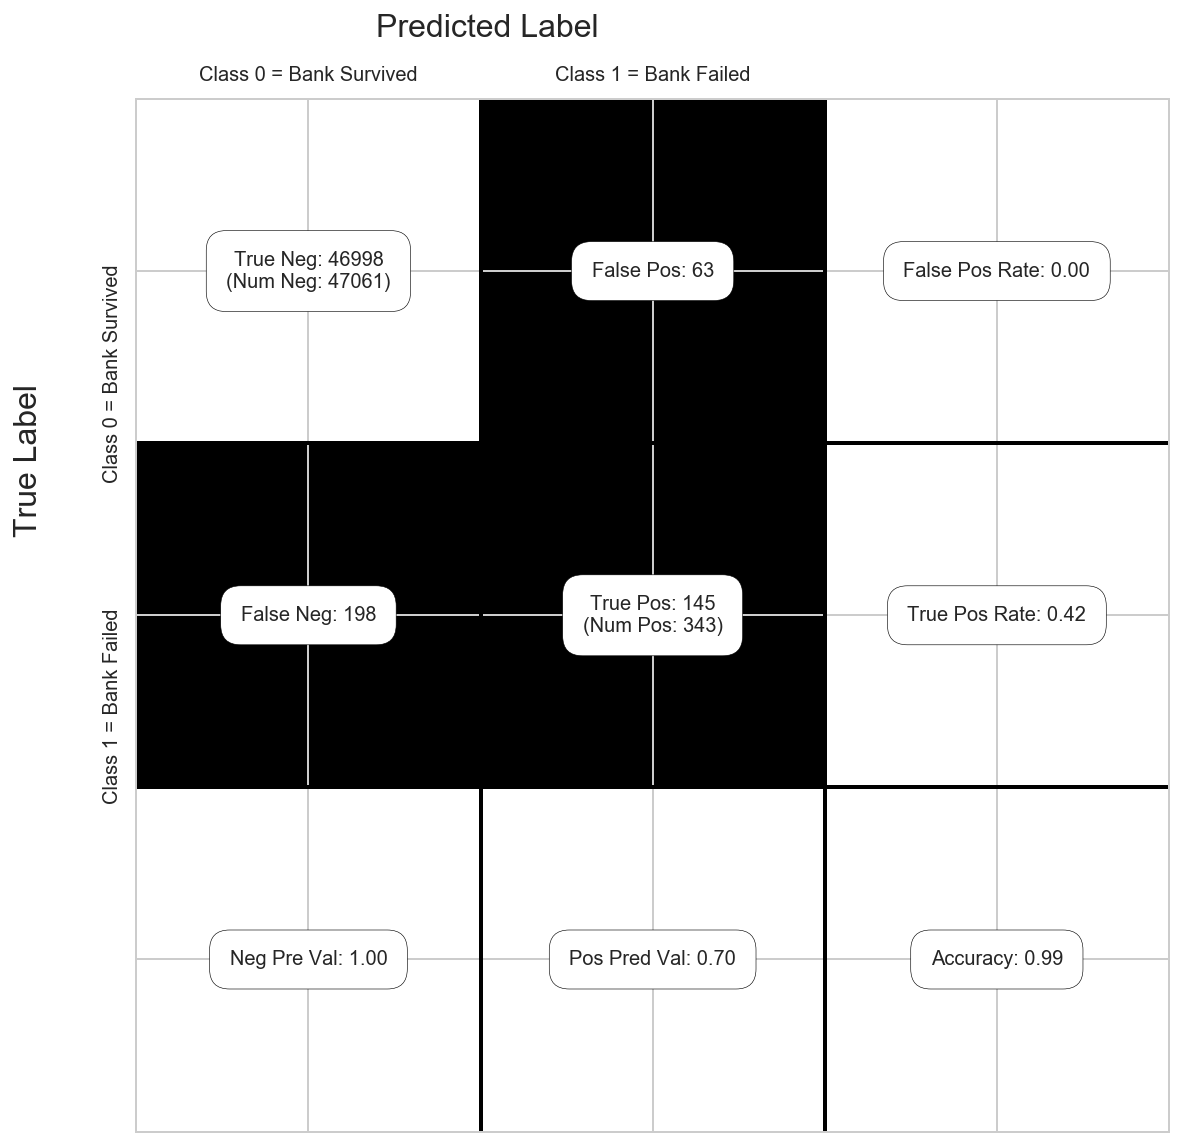

In [50]:
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Bank Survived', 'Class 1 = Bank Failed'])

#  Receiver Operating Characteristic Curve for Decision Tree

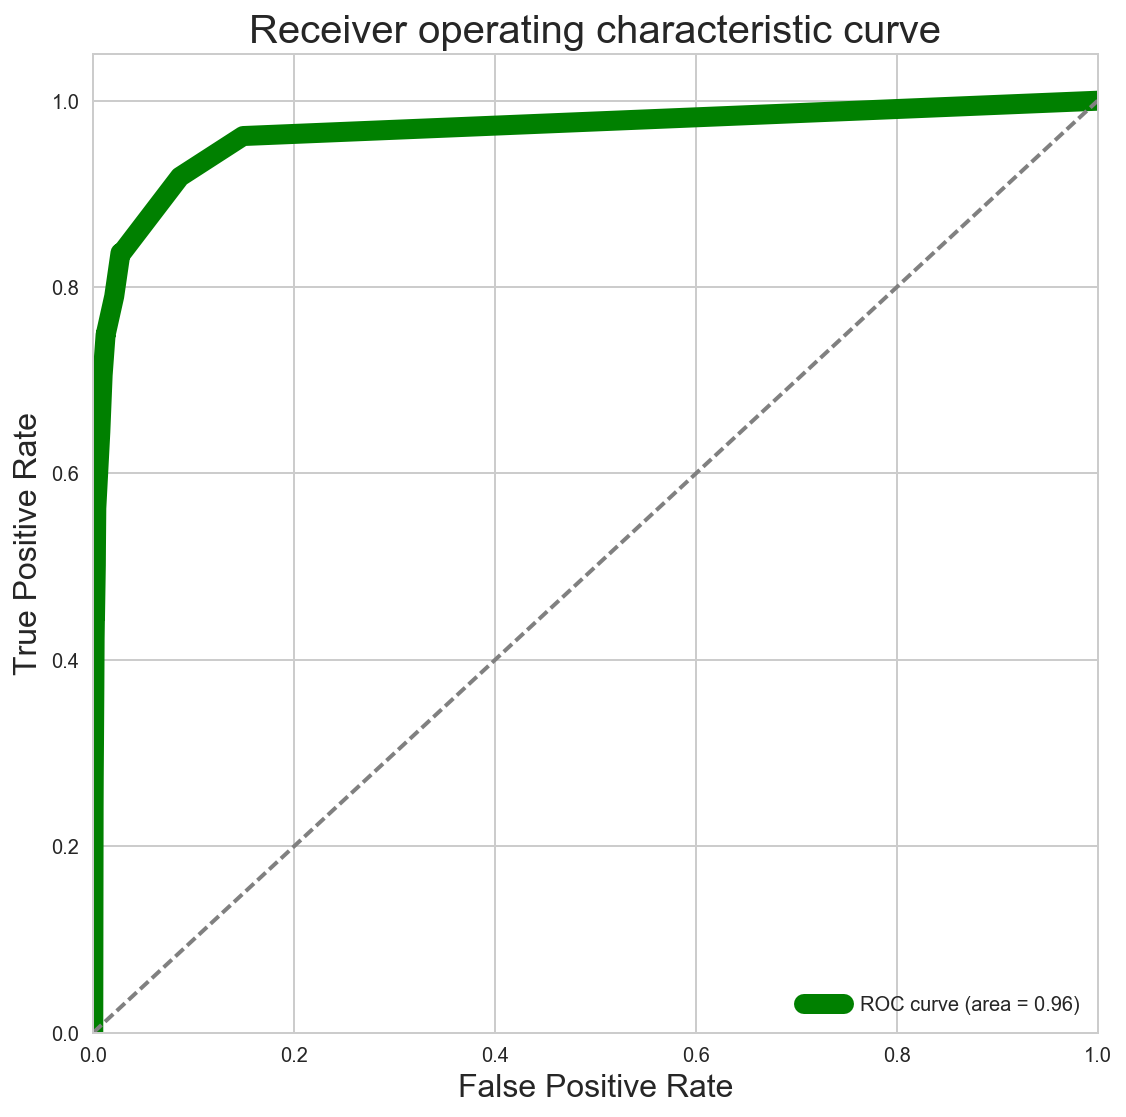

In [51]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [52]:
#Ref: Class notebook on Full Analysis
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(Xn, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

# List of important features for predictive accuracy

In [53]:
feature_importance(Xn, dct_best)

,feature,importance
16,avg_total_loans,0.652315
15,avg_earning_assets,0.147474
8,loss_allowance_to_loans,0.071001
14,total_risk_based_capital_ratio,0.021447
7,cash_dividends_to_net_income,0.019254
1,noninterest_income_to_avg_assets,0.018845
6,assets_per_employee_millions,0.016222
2,net_operating_income_to_assets,0.015913
4,credit_loss_provision_to_net_charge_offs,0.007613
5,efficiency_ratio,0.007383


# # Model 3: Random Forest Classification
The third method for analysis that I have used is Random Forest Classification to evaluate a list of best features to build a 

In [57]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import BaggingClassifier

In [58]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [59]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 25.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

# Evaluating best parameters and performance of RFC

In [60]:
rfc_best = rf_gs.best_estimator_
print "Best estimators on the left out data:\n", rfc_best
print ''

print "\nBest Params on hold out data (train):\n", rf_gs.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % rf_gs.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Best Params on hold out data (train):
{'max_features': 'log2', 'n_estimators': 100, 'max_depth': None}


Best Score on left out data:0.995 




# RFC Confusion Matrix

In [61]:
y_pred= rfc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Bank_survived', 'True_Label_1 Bank_failed'],
                         columns=['Predict_Label_0 Bank_survived', 'Predict_Label_1 Bank_failed'])

confusion

,Predict_Label_0 Bank_survived,Predict_Label_1 Bank_failed
True_Label_0 Bank_survived,47026,35
True_Label_1 Bank_failed,175,168


# RFC Classification Report

In [62]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     47061
          1       0.83      0.49      0.62       343

avg / total       1.00      1.00      1.00     47404



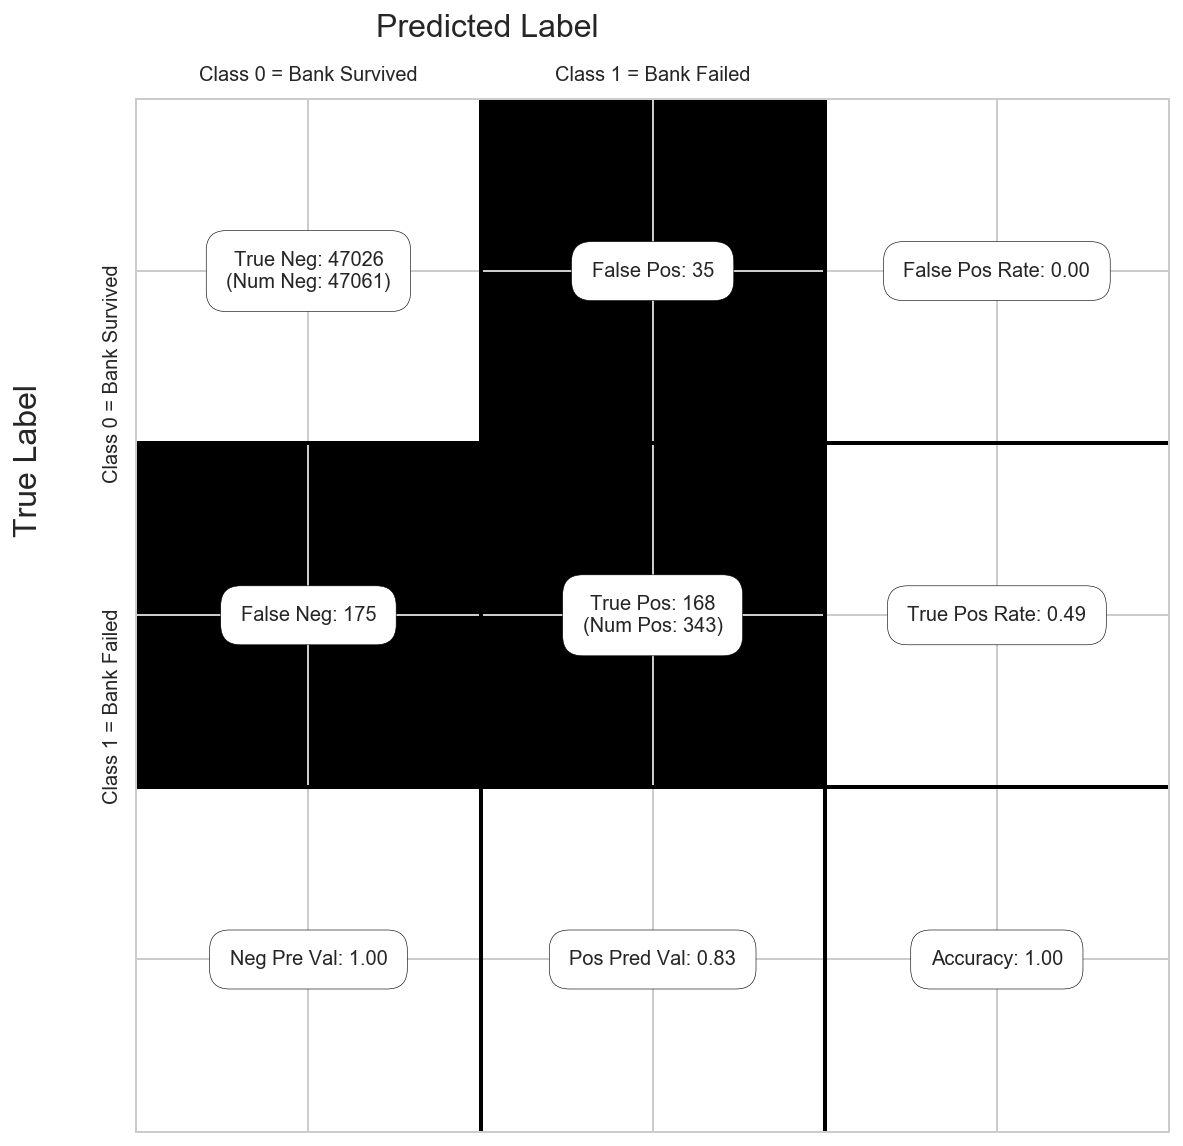

In [63]:
#Graphical representation of confusion matrix for RFC
C = confusion_matrix(y_test, rf_gs.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Bank Survived', 'Class 1 = Bank Failed'])

# Receiver Operating Characteristic Curve for RFC

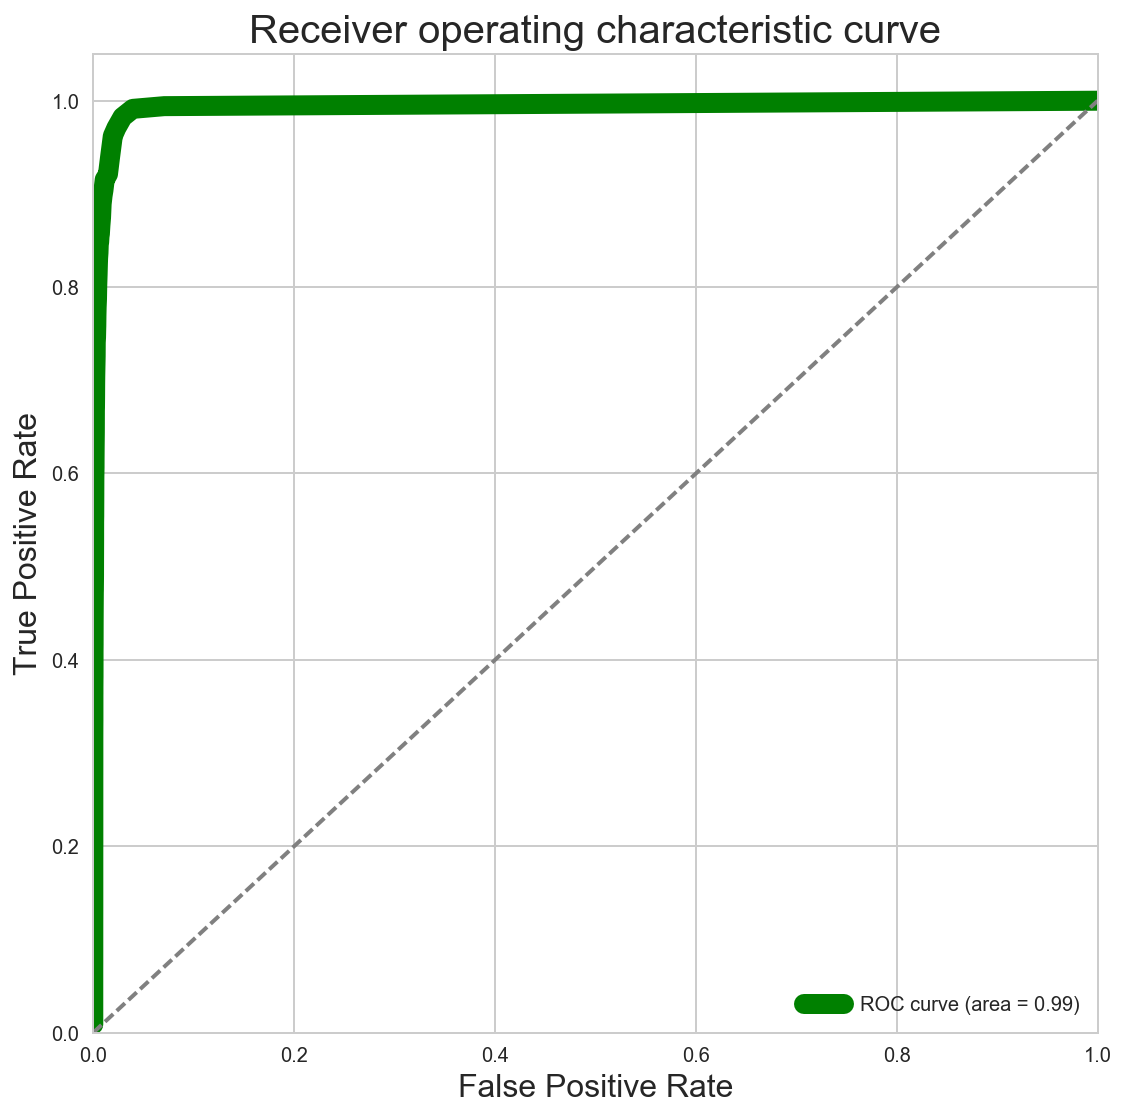

In [64]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = rf_gs.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# List of important features for predictive accuracy

In [65]:
feature_importance(Xn, rfc_best)

,feature,importance
16,avg_total_loans,0.148935
15,avg_earning_assets,0.140449
4,credit_loss_provision_to_net_charge_offs,0.099573
14,total_risk_based_capital_ratio,0.075273
8,loss_allowance_to_loans,0.058573
1,noninterest_income_to_avg_assets,0.055669
12,net_loans_and_leases_to_deposits,0.053454
7,cash_dividends_to_net_income,0.050107
11,net_loans_and_leases_to_total_assets,0.046760
9,loan_loss_allowance_to_noncurrent_loans,0.042396


Following function gives the MSE and R^2 for both train and test sets for each model, this method is useful to compare OLS but will not be of much help when we have a classification problem and building a predictive model

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [75]:
#The MSE, and the best model is obtained after carrying out the prediction

def rsquare_meansquare_error(y_train, y_test, X_train, X_test, test, best_model):
    
   
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
   
 #The model is called
    print ('MSE ' + test + ' train data: %.5f, test data: %.5f' % (
       mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
#The R^2 of the model is called
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
       r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

In [76]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Logistic", logit_best)
print '\n============================================================================\n'
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Decision Tree", dct_best)
print '\n============================================================================\n'
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest", rfc_best)
print '\n============================================================================\n'


MSE Logistic train data: 0.00574, test data: 0.00570
R^2 Logistic train data: 0.18, test data: 0.21


MSE Decision Tree train data: 0.00510, test data: 0.00551
R^2 Decision Tree train data: 0.28, test data: 0.23


MSE Random Forest train data: 0.00000, test data: 0.00443
R^2 Random Forest train data: 1.00, test data: 0.38




https://github.com/spgunjal/ECON628-01-spgunjal/blob/master/Project2_Final_EDA_Shiv.ipynb

# FINAL REPORT

Post 2007 Global Financial Meltdown, the issue of financial health of the banking industry came to the forefront. This field of study is abundant with literature on emperical analysis of measuring financial health of banks by using various financial and non-financial measurements. Most of this research is focused on the causal analysis attempting to estimate parameters which might point towards worsening health of banks.

In this project I further the frontiers of this field by building a predictive model for bank failures which can be used for preventive measures rather than having a reponse policy.I specifically focus on bank level characteristics in absense of external macro-economic shocks.

The data used for this project is collected from Federal Deposite Insurance Corporation (FDIC) USA.The data set contains a matrix of various measures of financial health of banks as reported in balance sheets on quarterly basis. The period of consideration is fron 2001 to end of 2016. As mentioned in the exploratory data analysis many important features have skewed distribution with outliers so before model specification I normalize all the features. Also to avoid multicolinearity I have made sure that only those variables are included in the model which are not highly correlated and also captures broader aspects of financial health of banks.

To predict failing banks accurately I have created a 'class' variable which is a binary classifier taking the value 1 if a bank failed otherwise takes the value of 0. One can use Linear Probability models to evaluate the probabilities of bank failures. Since the purpose of this project is to build a predictive model I have opted for Logistic, Dicision Tree and Random Forest Classifiers as to attain highest possible accuracy in prediction.

Since this topic comes under classification method for the purpose of building a predictive model(predicting bank failures) I'll focus more on the accuracy of prediction instead of ususal measure like R^2.

Results and Discussion:
The area under ROC for all three methods is above 0.95 showing a high accuracy of these models. The best estimation for Logistic regression has ROC of 0.98 while that for Decision Tree and Random Forest Classifier are 0.96 and 0.99. As we know that theoretically the decision tree classifier is prone to overfitting in most of the cases it outperforms random forect. My results show that Random Forest classifier outperforms both Logistic and Decision tree which is in line with various emperical tests.
I'll focus more on the Classification Report rather than ROC as my data set contains only 1127 observations under class:1 and more than 150000 in class:0. Due to such lopsided data the ROC will not be the best measure of accuracy of models as the main objective of this study is to predict bank failures(Class:1). The below analysis focuses on three main components namely- Precision, Recall and F1-Score from the classification report to compare accuracy of correctly predicting bank failures.

            Method Name      Class     Precision     Recall     F1-Score
            Logistic           1          0.70        0.38         0.49
            Decision Tree      1          0.70        0.42         0.53
            Random Forest Cl.  1          0.83        0.49         0.62
As we can observe the Precision is highest for Random Forest Classifier for the Class=1 (Failed Bank). The average precision indicates the ability of the classifier to correctly classify the current class. If we look at the recall which shows the ability of classifier to correctly predict all observation (in this case for class=1 i.e tha bank failed). Here as well the RFC outperforms the remaining two methods. Now for botht this measures the closer the ratio to 1 the better the accuracy of the model is. The F1-Score is a combined measure of both Precision and Recall. Again a F1-Score of 1 indicated 100% accuracy of the classifier to correctly classify and also to correctly predict all observations. It is again evident that the Random Forest Classifier outperforms both Logistic and Decision Tree classifiers. If we consider all three measures for all the methods the Logistic performs worst while the Random Forest Classifier outperforms other two methods.

Concluding Remarks (Caution notes):
Firstly,there are various factors to consider before arriving at a decision on model specification. One of the issue can be the stability of the model in dynamic environment. Many a times the models perform better when static data is used but might not perform better otherwise.
Secondly, this model specification is focused only on firm specific characteristics, so should be looked upon as a standalone analysis.
Apart from these two factors I'll go ahead and use Random Forest Classifier to predict bank failures. 
Following are the Features under the RFC with respect to their importance:

	feature	importance
16	avg_total_loans	---                             0.148935
15	avg_earning_assets---	                        0.140449
4	credit_loss_provision_to_net_charge_offs	    0.099573
14	total_risk_based_capital_ratio	                0.075273
8	loss_allowance_to_loans	                        0.058573
1	noninterest_income_to_avg_assets	            0.055669
12	net_loans_and_leases_to_deposits	            0.053454
7	cash_dividends_to_net_income	                0.050107
11	net_loans_and_leases_to_total_assets	        0.046760
9	loan_loss_allowance_to_noncurrent_loans	        0.042396
13	equity_capital_to_assets	                    0.039251
2	net_operating_income_to_assets	                0.039135
0	net_interest_margin	                            0.038346
3	roa	                                            0.038184
5	efficiency_ratio	                            0.037931
6	assets_per_employee_millions	                0.033379
10	noncurrent_assets+other_real_estate_owned_to_a..0.002586
